In [1]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import xarray as xr

In [3]:
### Point to data
in_dir = Path('/scratch/orybchuk/wakedynamics/bcs-ldm/simulations/072415/large_campaigns/precursor/postprocessing/wide_gt_and_up')
f_in = Path(in_dir, 'gt_and_up0004.nc')
ds = xr.open_dataset(f_in)

/tmp/scratch/4272104/ipykernel_1635087/3355380619.py:40: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar0 = fig.colorbar(im0, cax=cax0)


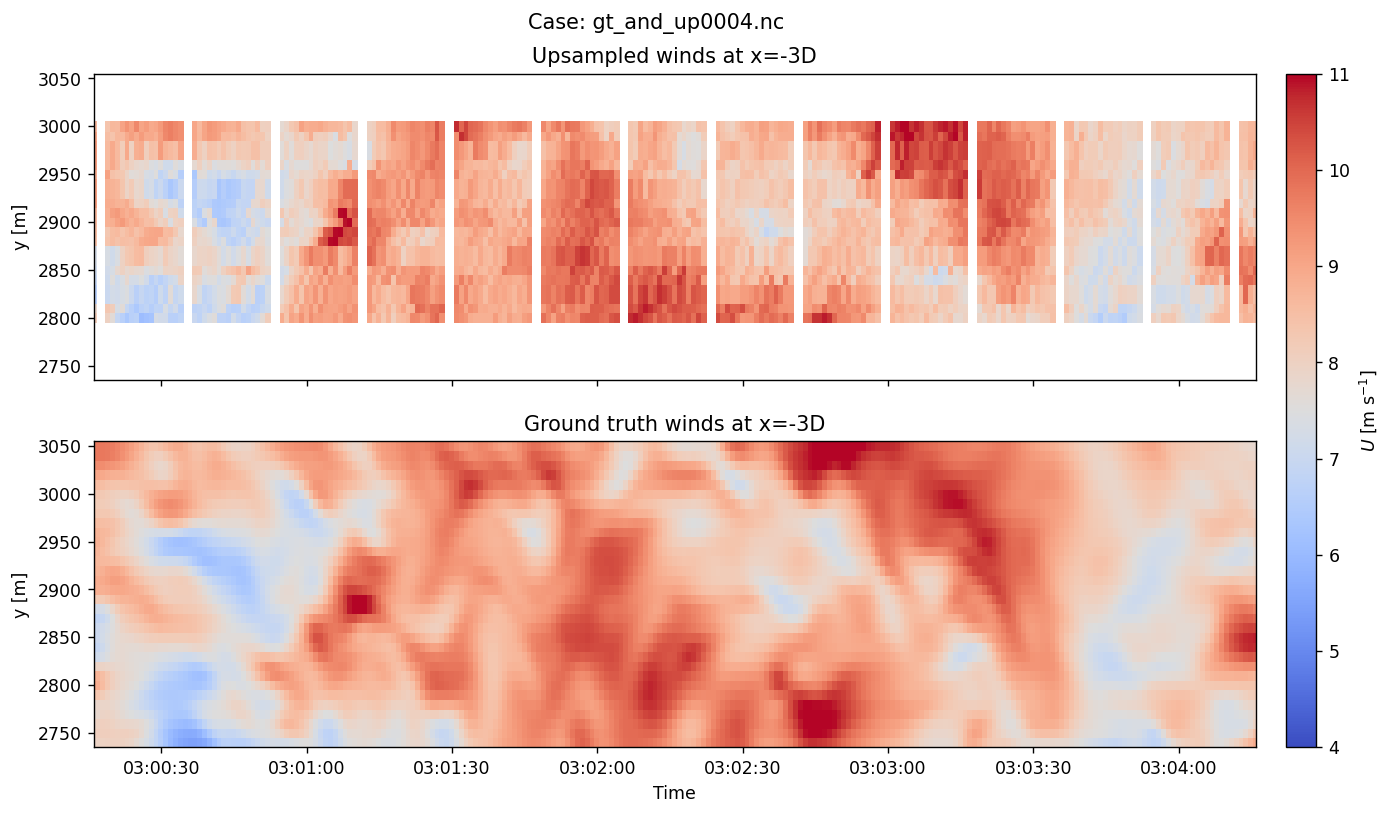

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(12, 7), dpi=125, sharex=True, sharey=True)

## Decorate
cmap = 'coolwarm'
ax[0].set_ylabel("y [m]")
ax[1].set_ylabel("y [m]")
ax[-1].set_xlabel("Time")

ax[0].set_title("Upsampled winds at x=-3D")
ax[1].set_title("Ground truth winds at x=-3D")
plt.suptitle('Case: '+f_in.name, y=0.95)

data0 = ds['u_upsampled']
data1 = ds['u_gt']
# vmin = np.nanmedian(data0)-3
# vmax = np.nanmedian(data0)+3
vmin, vmax = 4, 11

im0 = ax[0].pcolor(ds['time'],
                ds['y'], 
                data0.T,
                vmin=vmin,
                vmax=vmax,
                cmap=cmap,
                shading="auto")

im1 = ax[1].pcolor(ds['time'],
                ds['y'], 
                data1.T,
                vmin=vmin,
                vmax=vmax,
                cmap=cmap,
                shading="auto")

## Colorbars
cax0 = fig.add_axes([ax[-1].get_position().x1+0.02,
                     ax[-1].get_position().y0,
                     0.02,
                     ax[0].get_position().y1-ax[-1].get_position().y0])
cbar0 = fig.colorbar(im0, cax=cax0)
cbar0.set_label('$U$ [m s$^{-1}$]')
cbar0.ax.tick_params()

ax[0].set_xlim(ds['time'].values[0], ds['time'].values[240])

# plt.savefig('figs/demo_compare_gt_and_upsampled.png', bbox_inches='tight')

plt.show()